In [1]:
import pandas as pd

# importing dataset, may take a few minutes to load due to size
df = pd.read_csv("datasets/NSDUH2015.tsv", sep="\t")

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2501) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## How Many People Have Ever Tried Illicit Drugs?

The NSDUH contains many different attributes that can be used to measure different levels of substance use. I will start with the most basic metric: whether or not a participant has ever tried a given drug. The NSDUH codebook provides very cut-and-dry attributes for this metric. Here's a dataframe:

In [277]:
# slicing the columns needed
ever_tried = df[["TOBFLAG", "ALCFLAG", "MRJFLAG", "LSDFLAG", "PSILCY2", "ECSTMOFLAG", "KETMINFLAG", "COLDFLGR", 
                "PNRNMFLAG", "TRQNMFLAG", "STMNMFLAG", "SEDNMFLAG", "COCFLAG", "METHAMFLAG", "HERFLAG", 
                 "CRKFLAG", "PCPFLAG"]]

# renaming the variables appropriately
ever_tried.columns = ["Tobacco", "Alcohol", "Marijuana", "LSD", "Magic Mushrooms", "Ecstasy / Molly", "Ketamine", 
                     "DXM / Cold Meds", "Prsc. Painkillers", "Prsc. Tranquilizers", "Prsc. Stimulants", 
                      "Prsc. Hypnotics", "Cocaine", "Meth", "Heroin", "Crack", "PCP"]

ever_tried[:5]

,Tobacco,Alcohol,Marijuana,LSD,Magic Mushrooms,Ecstasy / Molly,Ketamine,DXM / Cold Meds,Prsc. Painkillers,Prsc. Tranquilizers,Prsc. Stimulants,Prsc. Hypnotics,Cocaine,Meth,Heroin,Crack,PCP
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now we have a binary matrix of all 50,000+ survey respondents and whether or not they've identified as trying each listed drug, where a zero in the matrix means they're marked as having used the identified drug before and a one meaning they haven't. I attempted to group the substances in a somewhat logical order to better identify trends in our graphs: grouped by legal drugs first, then hallucinogens, then prescription drugs, and hard drugs last.

The drug categories provided for this metric, with usage percentages as identified in the codebook, are: 
- tobacco (in any of its form), 56.2%,
- alcohol, 72.8%,
- marijuana or hashish (in any of its forms), 42.5%,
- LSD (acid), 7.9%,
- psilocybin (magic) mushrooms, 8.1%,
- ecstasy, molly, or any variant, 8.0%,
- ketamine, 1.3%,
- over-the-counter cold medicine (DXM), 4.3%,
- non-doctor-approved misuse of prescription pain relievers (opiates), 11.1%,
- non-doctor-approved misuse of prescription tranquilizer (benzos, barbituates, or muscle relxants), 4.5%,
- non-doctor-approved misuse of prescription stimulants, mostly amphetamine, 5.0%,
- non-doctor-approved misuse of prescription sedatives, mostly hypnotics like Ambien, 2.0%,
- cocaine, 11.8%,
- methamphetamine, 4.6%,
- heroin, 1.7%,
- crack or freebase cocaine, 2.8%,
- PCP, 1.5%.

[Unfortunately due to the way the survey was constructed, we cannot isolate specifically for benzodiazepine, barbituate, muscle relaxant, or amphetamine usage, only their broader categories. We will be able to do that in some other metrics though. There are also some other drugs available in this metric including: mescaline, peyote, GHB, salvia, DMT, and inhalants. These were excluded out of lower importance and lower use rates but I'll look at them at the end.]

To start, here's a simple visualization of which drugs have been tried by the entire US population.

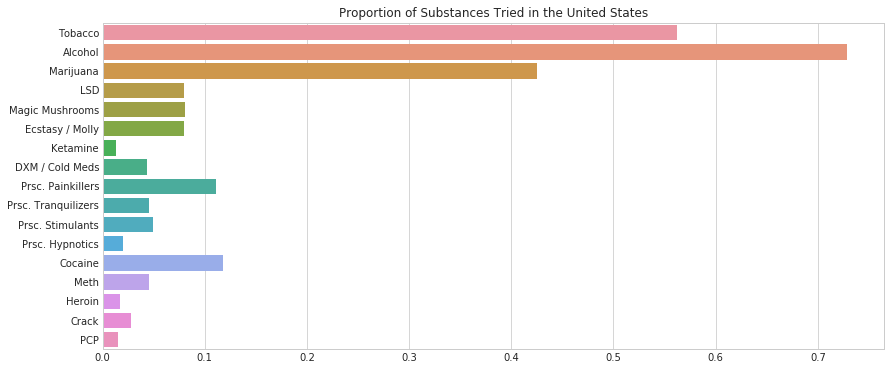

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(14,6))
ax = sns.barplot(orient="h", ci=None, data=ever_tried)
ax.set_title("Proportion of Substances Tried in the United States")

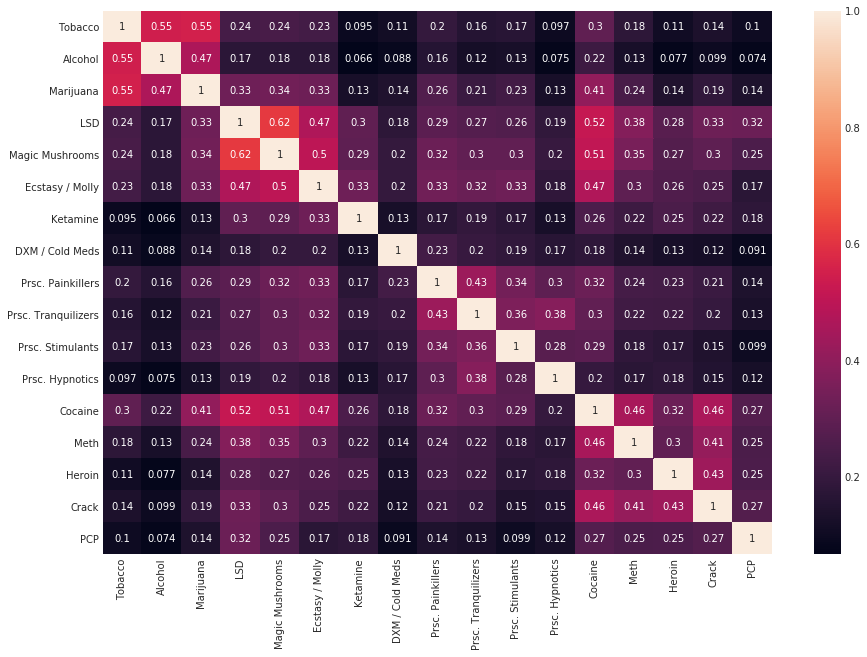

In [266]:
plt.figure(figsize=(15,10))
sns.heatmap(ever_tried.corr(),annot=True)

Trends can be seen above. The most noticiable observation is that most illicit and prescription drugs have a moderate to high correlation with each other. That is, the likelihood of having trying any particular drug increases for those who have tried other illicit drugs.

This plot is only showing when a substance has ever been used before. It does not take into account how long ago this drug was used or how many times it was used. If we are looking for more modern trends in drug usage, this is less useful considering more than 1/3 of the respondents are over the age of 35 and may not have even used any substances in decades. 

So alternately, we can analyze what drugs have been tried in the past year if we want to learn about more recent trends. Additionally, the NSDUH provides somewhat different attributes when asking for substance usage in the past year, and this will allow us to home in on some more specific classifiers of drugs. 

Let's create a new dataframe with substances used in the past year.

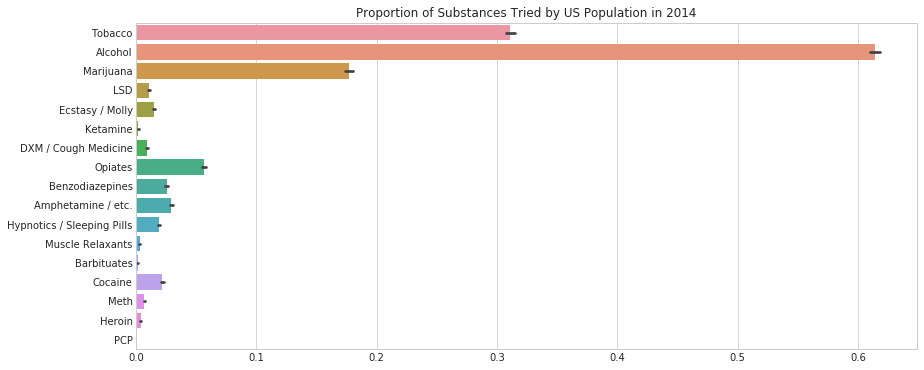

In [267]:
used_past_year = df[["TOBYR", "ALCYR", "MRJYR", "LSDYR", "ECSTMOYR", "KETMINYR", "COLDYRR", "PNRNMYR", 
                     "TRBENZPYMU", "AMMEPDPYMU", "SEDOTANYR2", "MUSRLXPYMU", "BARBITAPYU","COCYR", "METHAMYR", 
                     "HERYR", "PCPYR"]]
used_past_year.columns = ["Tobacco", "Alcohol", "Marijuana", "LSD", "Ecstasy / Molly", "Ketamine", 
                          "DXM / Cough Medicine", "Opiates", "Benzodiazepines", 
                          "Amphetamine / etc.", "Hypnotics / Sleeping Pills", "Muscle Relaxants", 
                          "Barbituates", "Cocaine", "Meth", "Heroin", "PCP"]

plt.figure(figsize=(14,6))
ax = sns.barplot(orient="h", data=used_past_year)
ax.set_title("Proportion of Substances Tried by US Population in 2014")

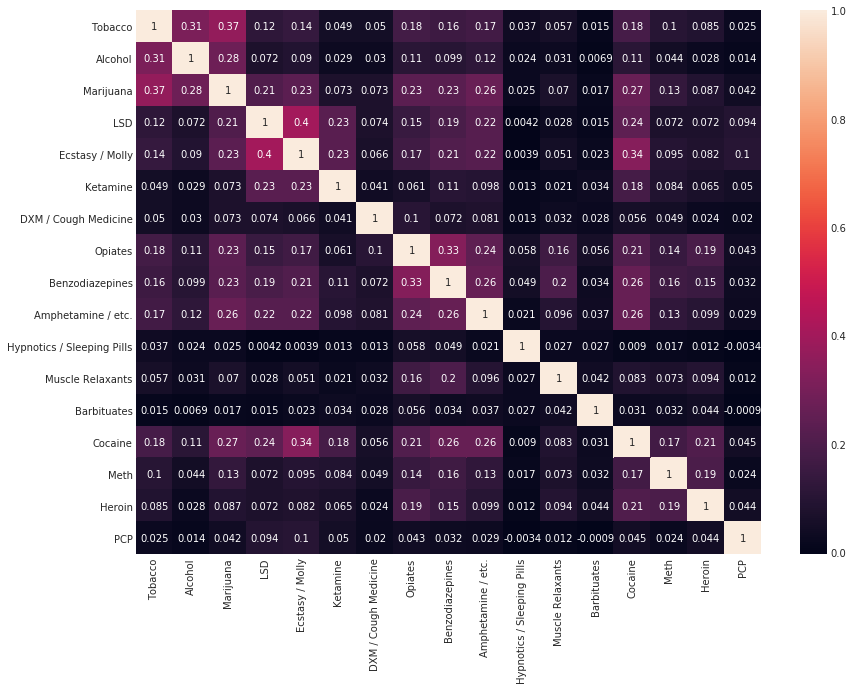

In [268]:
plt.figure(figsize=(14,10))
sns.heatmap(used_past_year.corr(),annot=True)

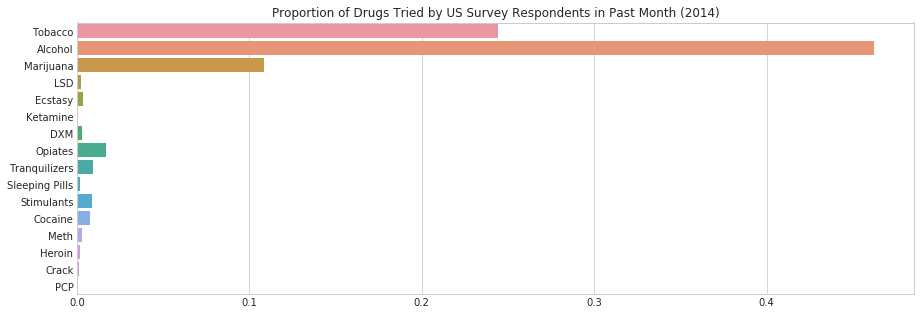

In [269]:
used_past_month = df[["TOBMON", "ALCMON", "MRJMON", "LSDMON", "ECSTMOMON", "KETMINMON", "COLDMONR", "PNRNMMON", 
                      "TRQNMMON", "SEDNMMON", "STMNMMON", "COCMON", "METHAMMON", "HERMON", "CRKMON", "PCPMON"]]
used_past_month.columns = ["Tobacco", "Alcohol", "Marijuana", "LSD", "Ecstasy", "Ketamine", "DXM", 
                           "Opiates", "Tranquilizers", "Sleeping Pills", "Stimulants", "Cocaine", "Meth", 
                           "Heroin", "Crack", "PCP"]

plt.figure(figsize=(15,5))
ax = sns.barplot(orient="h", data=used_past_month, ci=None)
ax.set_title("Proportion of Drugs Tried by US Survey Respondents in Past Month (2014)")

Alcohol and tobacco use dwarf illicit drug use by such a huge amount that it's hard to compare the usage rate of illicit/prescription drugs. Let's make a new graph with them removed to zoom in specifically on illicit substances.

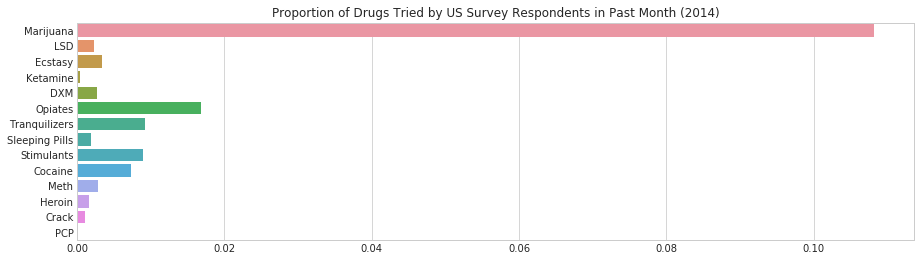

In [270]:
used_past_month2 = df[["MRJMON", "LSDMON", "ECSTMOMON", "KETMINMON", "COLDMONR", "PNRNMMON", "TRQNMMON", "SEDNMMON", "STMNMMON", "COCMON", "METHAMMON", "HERMON", "CRKMON", "PCPMON"]]
used_past_month2.columns = ["Marijuana", "LSD", "Ecstasy", "Ketamine", "DXM", "Opiates", "Tranquilizers", "Sleeping Pills", "Stimulants", "Cocaine", "Meth", "Heroin", "Crack", "PCP"]

plt.figure(figsize=(15,4)) # plot re-size
ax = sns.barplot(orient="h", data=used_past_month2, ci=None)
ax.set_title("Proportion of Drugs Tried by US Survey Respondents in Past Month (2014)")

We can also make a correlation matrix heatmap for "used_past_month" if we wanted to, but I'm going to exclude it considering it's not terribly different or more illuminating than the "used_past_year". In fact, the entire "used_past_month" metric is really not that different from "used_past_year". 

Instead something that CAN be more illuminating would be the quantity that someone uses in a month. Luckily, for some drug classes, the NSDUH provides an attribute where respondents report the number of times they've used a drug in the past month. 

In [271]:
heavy_use = df[["ALCMDAYS", "MRJMDAYS", "HALLNDAYPM", "PNRNDAYPM", "TRQNDAYPM", "STMNDAYPM", "SEDNDAYPM",
                "COCMDAYS", "METHNDAYPM", "IRHERFM"]]
heavy_use.columns = ["Alcohol", "Marijuana", "Hallucinogens", "Opiates", "Tranquilizers", "Amphetamine", 
                      "Sleeping Pills", "Cocaine", "Meth", "Heroin"]
heavy_use[:6]

,Alcohol,Marijuana,Hallucinogens,Opiates,Tranquilizers,Amphetamine,Sleeping Pills,Cocaine,Meth,Heroin
0,1,5,5,5,5,5,5,5,5,91
1,3,4,5,5,5,5,5,5,5,91
2,5,5,5,5,5,5,5,5,5,91
3,5,5,5,5,5,5,5,5,5,91
4,5,5,5,5,5,5,5,5,5,91
5,3,5,5,5,5,5,5,5,5,91


The chart above is coded into categories where the numbers 1 through 4 refer to specific categories of usage in the past month, where 5 refers to a drug having not been used in the past month at all. The exception is for "Heroin", which is using a slightly different reference code than the others, so I'll have to take care of it specially. 

Now I just want to make this a simple binary matrix where a "0" means that the respondent is not a heavy recent user of a given drug and a "1" means that the respondent is a heavy user of a given drug, where heavy use is defined having used 3 or more times in the past month. We'll replace the entries in the "heavy_use" dataframe to make it happen; the following code will make sense if you look at the variables used in the "heavy_use" dataframe in the NSDUH codebook.

In [272]:
heavy_use["Heroin"].replace({91:0, 93:0, 1:0, 2:0}, inplace=True)
heavy_use["Heroin"][heavy_use["Heroin"]>0] = 2
heavy_use.replace({5:0, 1:0, 2:1, 3:1, 4:1}, inplace=True)

/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.5/d

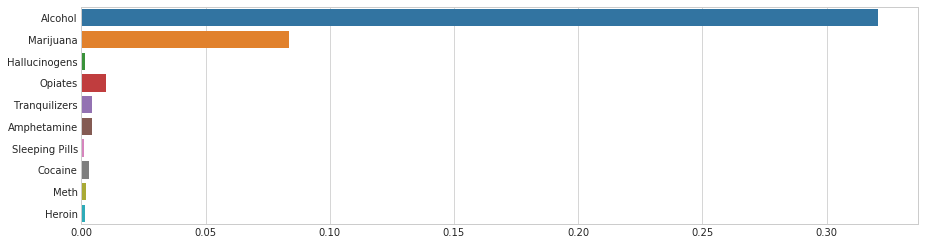

In [273]:
plt.figure(figsize=(15,4))
sns.barplot(orient="h", data=heavy_use, ci=None)

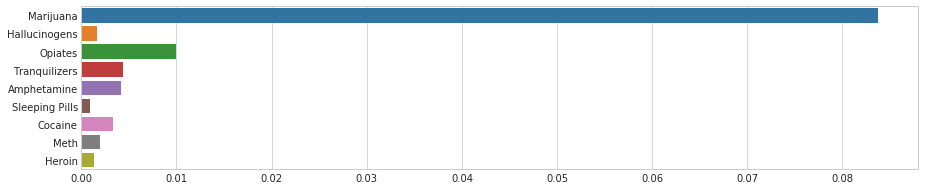

In [274]:
heavy_use2 = heavy_use[["Marijuana", "Hallucinogens", "Opiates", "Tranquilizers", "Amphetamine", 
                      "Sleeping Pills", "Cocaine", "Meth", "Heroin"]]

plt.figure(figsize=(15,3)) # plot re-size
sns.barplot(orient="h", data=heavy_use2, ci=None)

# USING SPECIFIC DEMOGRAPHICS

The above charts give us a feel for general drug use across the entire US population. However, what about specific groups of people? The NSDUH includes hundreds of metrics about each individual that we can look at ranging from identities to mental health to physical health to even questions about childhood experiences. For this section we'll start with the most basic possible demographics: sex, race, age, and income.

In [275]:
# function that adds four demographic columns, converts codes into text, and turns data frame to long-form
def demographics_transform(data):
    new_data = data.assign(SEX = df["IRSEX"], RACE = df["NEWRACE2"], AGE = df["CATAG3"], INCOME = df["INCOME"])
    new_data["SEX"].replace({1:"Male", 2:"Female"}, inplace=True)
    new_data["RACE"].replace({1:"White", 2:"Black", 3:"Native American", 4:"Pacific Islander", 
                           5:"Asian", 6:"Mixed Race", 7:"Hispanic"}, inplace=True)
    new_data["AGE"].replace({1:"12-17", 2:"18-25", 3:"26-34", 4:"35-49", 5:"50+"}, inplace=True)
    new_data["INCOME"].replace({1:"<$20K", 2:"$20K-$50K", 3:"$50K-$75K", 4:"$75K+"}, inplace=True)
    new_data = pd.melt(new_data, id_vars=["SEX", "RACE", "AGE", "INCOME"], 
                        var_name="drug", value_name="drug use")
    return new_data



Here we will look at what demographics have ever tried a given drug broken down by gender, race, age, and income bracket.

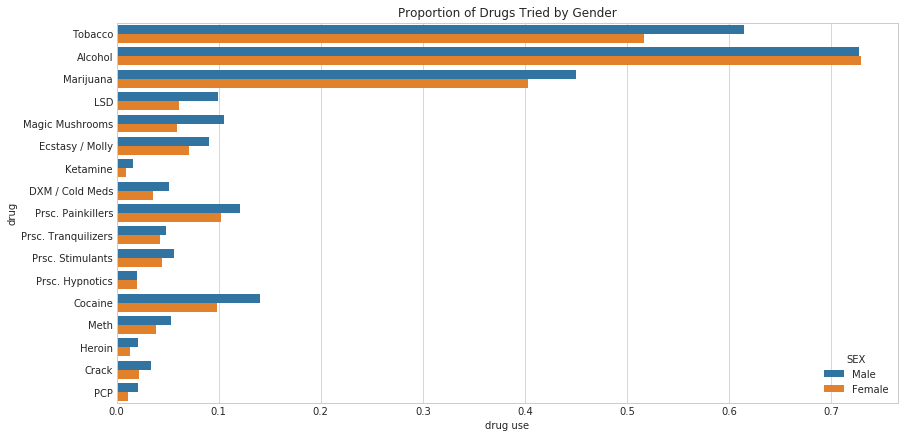

In [278]:
ever_tried = demographics_transform(ever_tried)

plt.figure(figsize=(14,7))
ax = sns.barplot(orient="h", y="drug", x="drug use", hue="SEX", ci=None, data=ever_tried)
ax.set_title("Proportion of Drugs Tried by Gender")

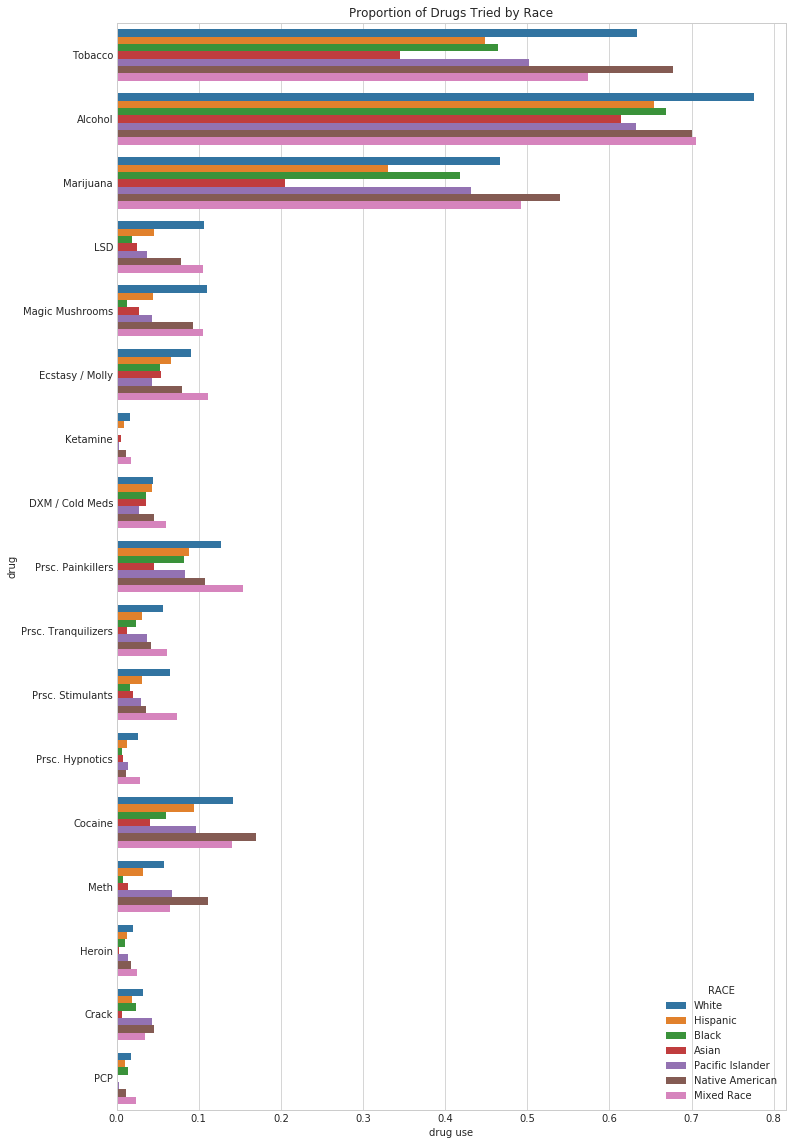

In [279]:
plt.figure(figsize=(12,20)) # plot re-size
ax = sns.barplot(orient="h", y="drug", x="drug use", hue="RACE", 
            hue_order=["White", "Hispanic", "Black", "Asian", "Pacific Islander", "Native American", "Mixed Race"],
            ci=None, data=ever_tried)
ax.set_title("Proportion of Drugs Tried by Race")

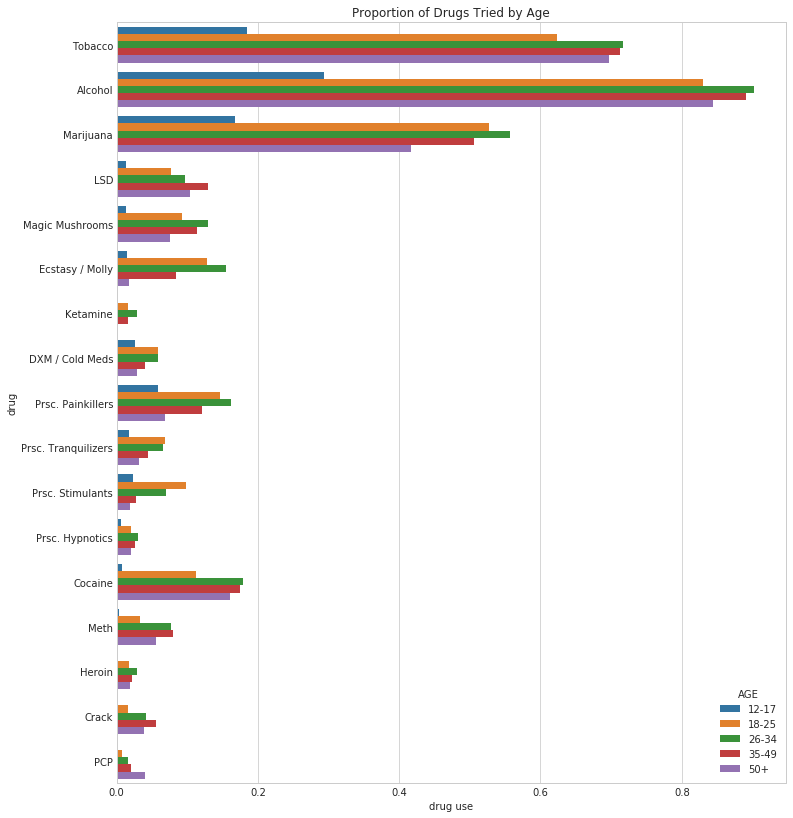

In [280]:
plt.figure(figsize=(12,14)) # plot re-size
ax = sns.barplot(orient="h", y="drug", x="drug use", hue="AGE", hue_order=["12-17", "18-25", "26-34", "35-49", 
                                                                  "50+"], ci=None, data=ever_tried)
ax.set_title("Proportion of Drugs Tried by Age")

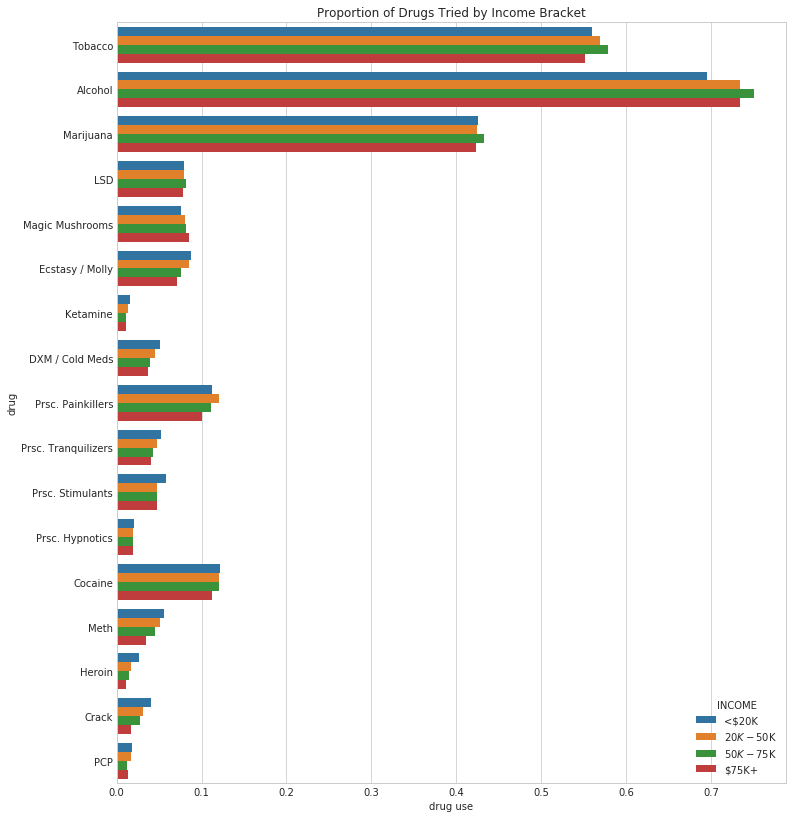

In [281]:
plt.figure(figsize=(12,14)) # plot re-size
ax = sns.barplot(orient="h", y="drug", x="drug use", hue="INCOME", 
            hue_order=["<$20K", "$20K-$50K", "$50K-$75K", "$75K+"], ci=None, data=ever_tried)
ax.set_title("Proportion of Drugs Tried by Income Bracket")

Here we will look at what demographics have ever tried a given drug broken down by gender, race, age, and income bracket.

In [289]:
# due to the low use rates of a couple of the drugs used in the earlier "used_past_year" dataframe, taking out some
used_past_year2 = df[["TOBYR", "ALCYR", "MRJYR", "LSDYR", "ECSTMOYR", "COLDYRR", "PNRNMYR", 
                     "TRBENZPYMU", "AMMEPDPYMU", "SEDOTANYR2","COCYR", "METHAMYR", 
                     "HERYR"]]
used_past_year2.columns = ["Tobacco", "Alcohol", "Marijuana", "LSD", "Ecstasy / Molly",  
                          "DXM / Cough Medicine", "Opiates", "Benzodiazepines", 
                          "Amphetamine / etc.", "Hypnotics / Sleeping Pills", 
                          "Cocaine", "Meth", "Heroin"]

used_past_year2 = demographics_transform(used_past_year2)

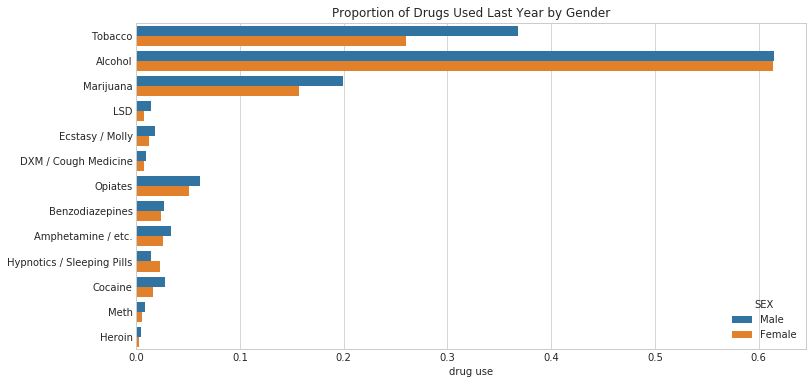

In [290]:
plt.figure(figsize=(12,6)) # plot re-size
ax = sns.barplot(orient="h", y="drug", x="drug use", hue="SEX", ci=None, data=used_past_year2)
ax.set_ylabel('') 
ax.set_title("Proportion of Drugs Used Last Year by Gender")

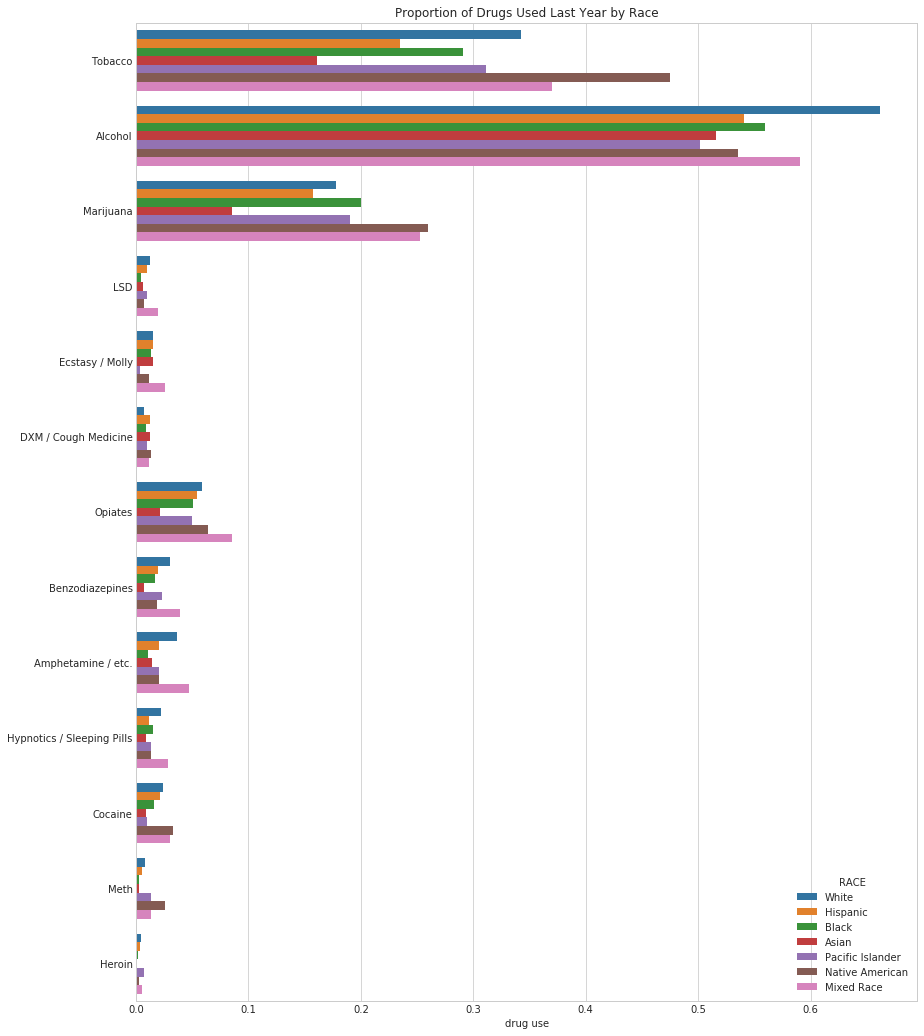

In [291]:
plt.figure(figsize=(14,18)) # plot re-size
ax = sns.barplot(orient="h", y="drug", x="drug use", hue="RACE", 
            hue_order=["White", "Hispanic", "Black", "Asian", "Pacific Islander", "Native American", "Mixed Race"],
            ci=None, data=used_past_year2)
ax.set_ylabel('') 
ax.set_title("Proportion of Drugs Used Last Year by Race")

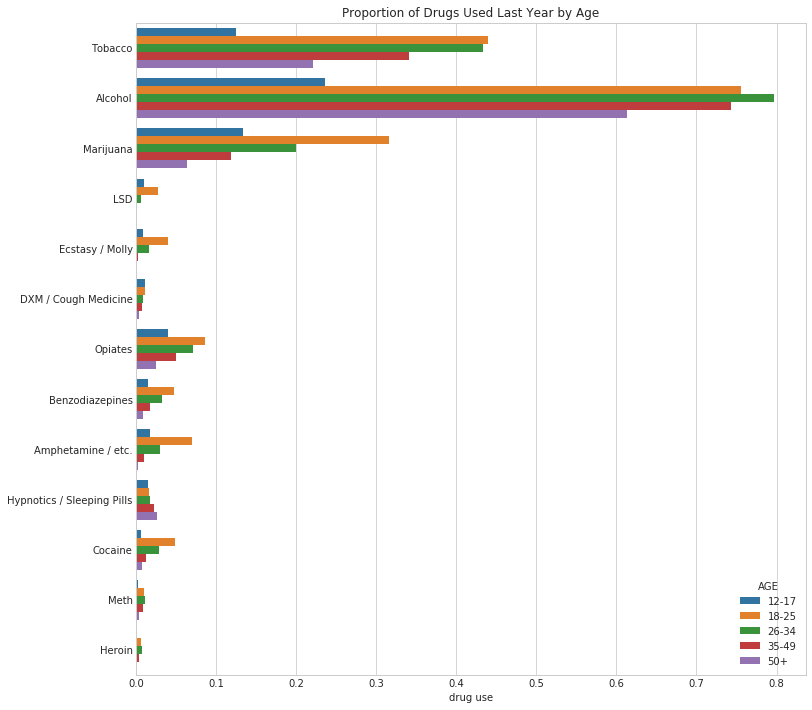

In [292]:
plt.figure(figsize=(12,12)) # plot re-size
ax = sns.barplot(orient="h", y="drug", x="drug use", hue="AGE", hue_order=["12-17", "18-25", "26-34", "35-49", 
                                                                  "50+"], ci=None, data=used_past_year2)
ax.set_ylabel('') 
ax.set_title("Proportion of Drugs Used Last Year by Age")

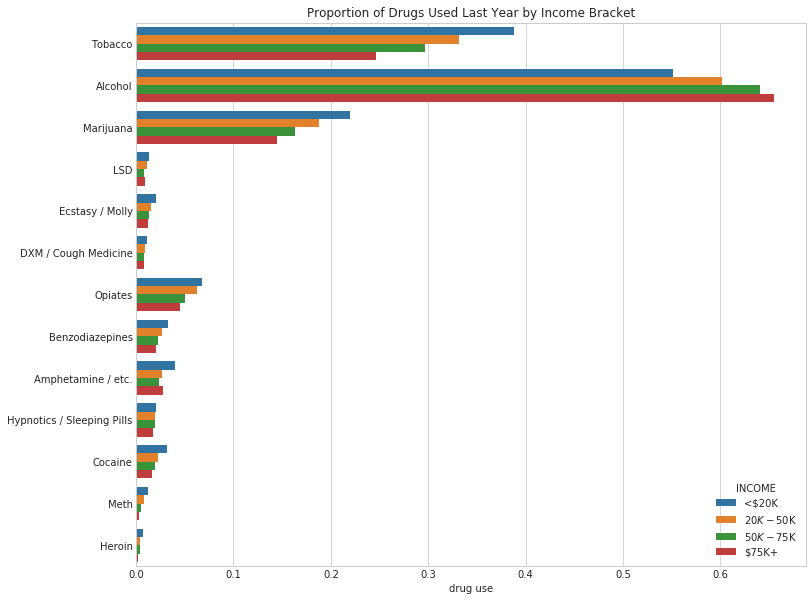

In [293]:
plt.figure(figsize=(12,10)) # plot re-size
ax = sns.barplot(orient="h", y="drug", x="drug use", hue="INCOME", 
            hue_order=["<$20K", "$20K-$50K", "$50K-$75K", "$75K+"], ci=None, data=used_past_year2)
ax.set_ylabel('') 
ax.set_title("Proportion of Drugs Used Last Year by Income Bracket")

Lastly we will look at what demographics have people considered "heavy users" (defined as using a given drug 3+ more times in the past month) broken down by gender, race, age, and income bracket.

In [294]:
heavy_use2 = demographics_transform(heavy_use2)

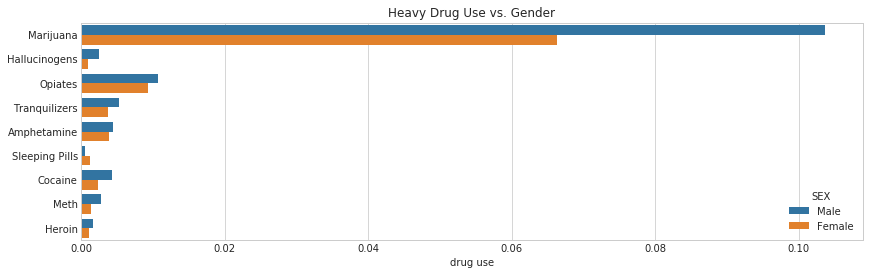

In [295]:
plt.figure(figsize=(14,4)) # plot re-size
ax = sns.barplot(orient="h", y="drug", x="drug use", hue="SEX", ci=None, data=heavy_use2)
ax.set_ylabel('') 
ax.set_title('Heavy Drug Use vs. Gender')

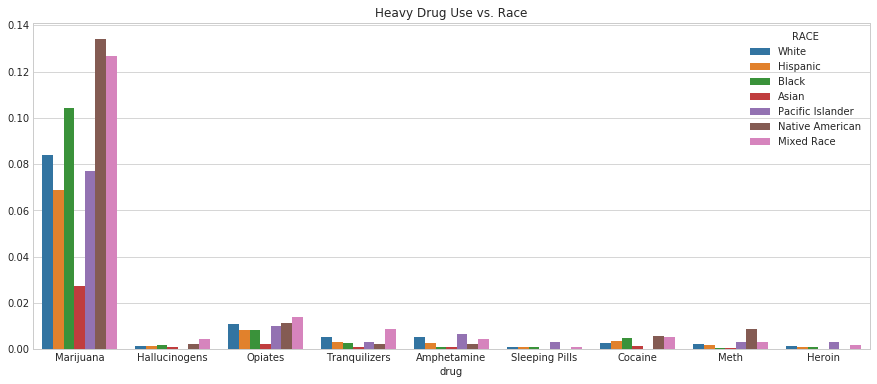

In [296]:
plt.figure(figsize=(15,6)) # plot re-size
sns.set_style("whitegrid")
ax = sns.barplot(orient="v", x="drug", y="drug use", hue="RACE", 
            hue_order=["White", "Hispanic", "Black", "Asian", "Pacific Islander", "Native American", "Mixed Race"],
            data=heavy_use2, dodge=True, ci=None)
ax.set_ylabel('') 
ax.set_title('Heavy Drug Use vs. Race')

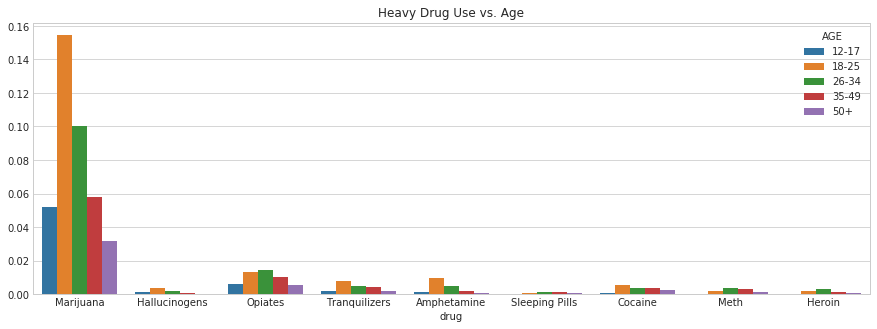

In [297]:
plt.figure(figsize=(15,5)) # plot re-size
ax = sns.barplot(orient="v", x="drug", y="drug use", hue="AGE", hue_order=["12-17", "18-25", "26-34", "35-49", 
                                                                  "50+"], ci=None, data=heavy_use2)
ax.set_ylabel('') 
ax.set_title('Heavy Drug Use vs. Age')

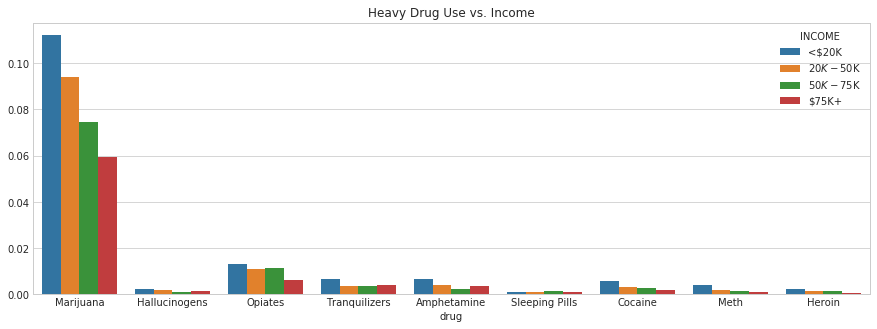

In [298]:
plt.figure(figsize=(15,5)) # plot re-size
ax = sns.barplot(orient="v", x="drug", y="drug use", hue="INCOME", 
            hue_order=["<$20K", "$20K-$50K", "$50K-$75K", "$75K+"], ci=None, data=heavy_use2)
ax.set_ylabel('') 
ax.set_title('Heavy Drug Use vs. Income')

# Appendix A: Other Drugs

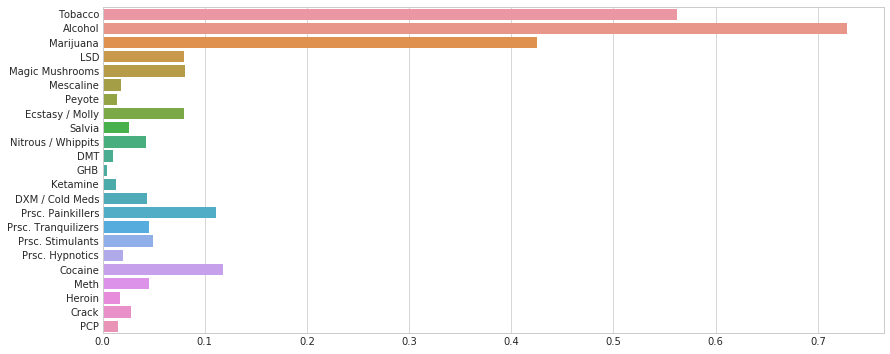

In [260]:
ever_tried_bonus = df[["TOBFLAG", "ALCFLAG", "MRJFLAG", "LSDFLAG", "PSILCY2", "MESC2", "PEYOTE2", "ECSTMOFLAG", "SALVIAFLAG", "NITOXID2", "DAMTFXFLAG", "GHBFLGR", "KETMINFLAG", "COLDFLGR", 
                "PNRNMFLAG", "TRQNMFLAG", "STMNMFLAG", "SEDNMFLAG", "COCFLAG", "METHAMFLAG", "HERFLAG", 
                 "CRKFLAG", "PCPFLAG"]]


ever_tried_bonus.columns = ["Tobacco", "Alcohol", "Marijuana", "LSD", "Magic Mushrooms", "Mescaline", "Peyote", "Ecstasy / Molly", "Salvia", "Nitrous / Whippits", "DMT",  "GHB", "Ketamine", 
                     "DXM / Cold Meds", "Prsc. Painkillers", "Prsc. Tranquilizers", "Prsc. Stimulants", 
                      "Prsc. Hypnotics", "Cocaine", "Meth", "Heroin", "Crack", "PCP"]

ever_tried_bonus[:5]
plt.figure(figsize=(14,6))
sns.barplot(orient="h", ci=None, data=ever_tried_bonus)

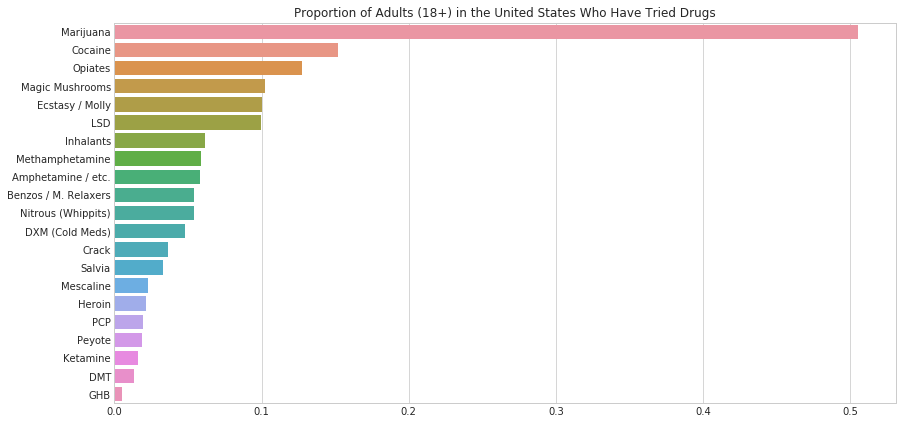

In [261]:
ever_tried_bonus = df[df["CATAGE"]>1][["MRJFLAG", "LSDFLAG", "PSILCY2", "MESC2", "PEYOTE2", "ECSTMOFLAG", "SALVIAFLAG", "NITOXID2", "DAMTFXFLAG", "GHBFLGR", "KETMINFLAG", "COLDFLGR", 
                "PNRNMFLAG", "TRQNMFLAG", "STMNMFLAG", "SEDNMFLAG", "COCFLAG", "METHAMFLAG", "HERFLAG", 
                 "CRKFLAG", "PCPFLAG"]]
Inhalants = df[df["CATAGE"]>1][["CLEFLU2", "GAS2", "GLUE2", "ETHER2", "SOLVENT2", "LGAS2", "FELTMARKR2", "SPPAINT2", "AIRDUSTER2", "OTHAEROS2"]]
Inhalants = Inhalants.sum(axis=1)
Inhalants[Inhalants>0] = 1
ever_tried_bonus = ever_tried_bonus.assign(Inhalants = Inhalants)

ever_tried_bonus.columns = ["Marijuana", "LSD", "Magic Mushrooms", "Mescaline", "Peyote", "Ecstasy / Molly", "Salvia", "Nitrous (Whippits)", "DMT",  "GHB", "Ketamine", 
                     "DXM (Cold Meds)", "Opiates", "Benzos / M. Relaxers", "Amphetamine / etc.", 
                      "Hypnotics / Sleeping Pills", "Cocaine", "Methamphetamine", "Heroin", "Crack", "PCP", "Inhalants"]

ever_tried_bonus[:5]
plt.figure(figsize=(14,7))
ax = sns.barplot(orient="h", ci=None, data=ever_tried_bonus,
           order=["Marijuana", "Cocaine", "Opiates", "Magic Mushrooms", "Ecstasy / Molly", "LSD", "Inhalants", "Methamphetamine", 
                 "Amphetamine / etc.", "Benzos / M. Relaxers", "Nitrous (Whippits)", "DXM (Cold Meds)", "Crack", 
                 "Salvia", "Mescaline", "Heroin", "PCP", "Peyote",  "Ketamine", "DMT", "GHB"])
ax.set_title("Proportion of Adults (18+) in the United States Who Have Tried Drugs")

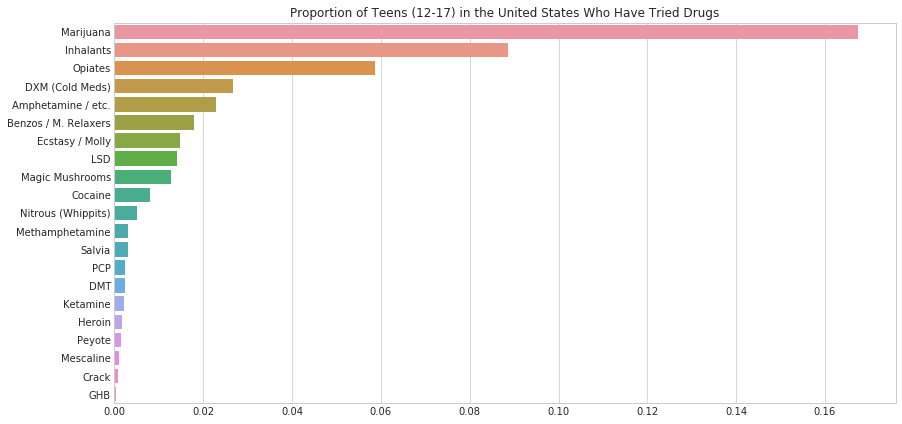

In [262]:
ever_tried_bonus = df[df["CATAGE"]==1][["MRJFLAG", "LSDFLAG", "PSILCY2", "MESC2", "PEYOTE2", "ECSTMOFLAG", "SALVIAFLAG", "NITOXID2", "DAMTFXFLAG", "GHBFLGR", "KETMINFLAG", "COLDFLGR", 
                "PNRNMFLAG", "TRQNMFLAG", "STMNMFLAG", "SEDNMFLAG", "COCFLAG", "METHAMFLAG", "HERFLAG", 
                 "CRKFLAG", "PCPFLAG"]]

Inhalants = df[["CLEFLU2", "GAS2", "GLUE2", "ETHER2", "SOLVENT2", "LGAS2", "FELTMARKR2", "SPPAINT2", "AIRDUSTER2", "OTHAEROS2"]]
Inhalants = Inhalants.sum(axis=1)
Inhalants[Inhalants>0] = 1
ever_tried_bonus = ever_tried_bonus.assign(Inhalants = Inhalants)

ever_tried_bonus.columns = ["Marijuana", "LSD", "Magic Mushrooms", "Mescaline", "Peyote", "Ecstasy / Molly", "Salvia", "Nitrous (Whippits)", "DMT",  "GHB", "Ketamine", 
                     "DXM (Cold Meds)", "Opiates", "Benzos / M. Relaxers", "Amphetamine / etc.", 
                      "Hypnotics / Sleeping Pills", "Cocaine", "Methamphetamine", "Heroin", "Crack", "PCP", "Inhalants"]

plt.figure(figsize=(14,7))
ax = sns.barplot(orient="h", ci=None, data=ever_tried_bonus,
           order=["Marijuana", "Inhalants", "Opiates", "DXM (Cold Meds)", "Amphetamine / etc.", "Benzos / M. Relaxers", 
                  "Ecstasy / Molly", "LSD", "Magic Mushrooms", "Cocaine", "Nitrous (Whippits)",  "Methamphetamine", 
                 "Salvia", "PCP", "DMT", "Ketamine", "Heroin",  "Peyote", "Mescaline",  "Crack", "GHB"])
ax.set_title("Proportion of Teens (12-17) in the United States Who Have Tried Drugs")